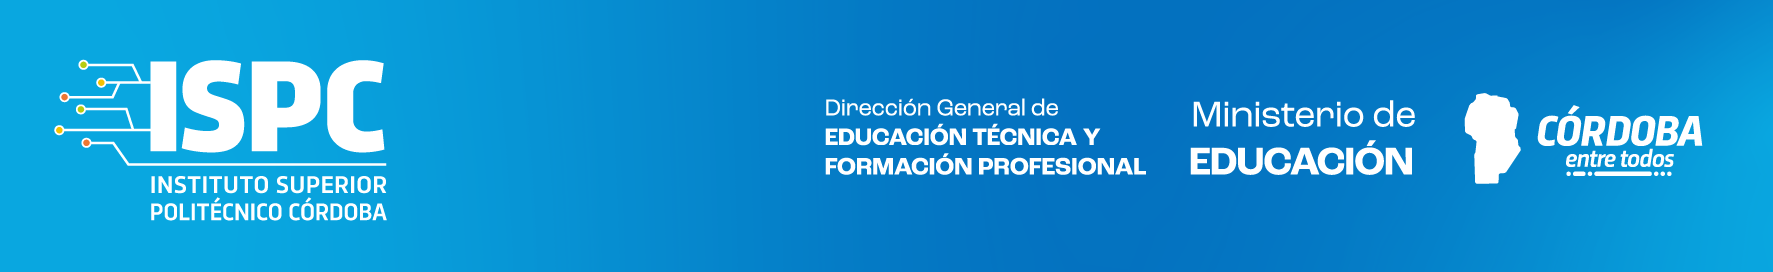

<br>
<br>

# Evidencia N° 6



<br>

# **Presentación de Analista de Datos: 27/10**



### Docentes:
- Marcos Ugarte
- Nahuel Pratta






### Alumnos Integrantes:
- Erick López
- Christian Nüesch
- Débora Zurita


<br>
<br>

pie_de_página.png

<br>
<br>

# Carga y preparación del dataset


<br>

En esta etapa, procederemos a cargar el conjunto de datos que ha sido procesado y curado en fases anteriores para asegurar su calidad y relevancia. Utilizaremos la librería Pandas para facilitar la manipulación de los datos. Dependiendo de tu entorno de trabajo, hay dos opciones para cargar el dataset:

 - Se puede subir el archivo CSV manualmente a la sección de archivos de Google Colab y luego cargarlo.
 - Se puede leer el archivo directamente desde un recurso online, como GitHub, utilizando la URL del archivo.


In [ ]:

# Importamos la función 'data_table' de Google Colab y habilitamos el formateador de DataFrames.
# Esto permite una visualización más interactiva de los DataFrames en el entorno de Colab.

from google.colab import data_table
data_table.enable_dataframe_formatter()


<br>


In [ ]:

# Importamos las librerías necesarias para cargar el dataset y
# realizar análisis posteriores
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Configuramos Pandas para mostrar los números flotantes con dos decimales,
# evitando así la notación científica
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Cargamos el dataset en un DataFrame llamado 'data'

# Para cargar el dataset desde Google Colab de manera manual en la seccion de archivos, usa la siguiente línea
# data = pd.read_csv('autos_argentina_curado.csv')

# Para leer el archivo directamente desde GitHub, utiliza la siguiente línea
data = pd.read_csv('https://raw.githubusercontent.com/ISPC-TSCDIA/Data24_PPI/refs/heads/main/datos/autos_argentina_curado.csv')

# Verificamos el dataset
data


,Marca,Modelo,Año,Color,Combustible,Puertas,Caja,Motor,Carrocería,Kilómetros,Precio,Moneda,Año_zscore
0,Jeep,Compass,2022,Blanco,Nafta,5,Automática,2.40,SUV,500,10850000,pesos,1.55
1,Jeep,Compass,2022,Gris oscuro,Nafta,5,Automática,2.40,SUV,500,35500,dólares,1.55
2,Toyota,Corolla,2019,Gris,Nafta,4,Manual,1.80,Sedán,9000,5800000,pesos,0.74
3,Jeep,Compass,2022,Negro,Nafta,5,Automática,1.30,SUV,10500,34500,dólares,1.55
4,Kia,Sorento,2014,Negro,Diésel,5,Automática,2.20,SUV,156000,25000,dólares,-0.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Chevrolet,Tracker,2018,Gris,Nafta,5,Automática,1.80,SUV,52000,5250000,pesos,0.47
496,Volkswagen,Amarok,2019,Gris,Diésel,4,Automática,3.00,Pick-Up,49000,46000,dólares,0.74
497,Peugeot,2008,2017,Blanco,Nafta,5,Manual,1.60,SUV,75358,3960000,pesos,0.20
498,Volkswagen,Amarok,2019,Gris,Diésel,4,Automática,3.00,Pick-Up,57500,44900,dólares,0.74


<br>

En los datos recolectados, se encuentran registros de autos en pesos y en dólares. Para unificar la moneda, realizamos una transformación en el dataframe para convertir todos los valores a dólares.

<br>

Optamos por esta alternativa considerando la posibilidad de añadir más registros en el futuro, lo que garantiza que todos los datos estén en una moneda constante y unificada.

<br>

Sin esta unificación, los análisis quedarían sesgados. La primera visualización del dataset muestra una gran diferencia nominal debido a la brecha cambiaria.

<br>

**Elección del tipo de cambio**

En Argentina, el tipo de cambio paralelo, conocido como "dólar blue", ofrece una mejor representación de la realidad económica para dolarizar precios en un dataset, especialmente para bienes de alto valor como vehículos. Esto se debe a que refleja de manera más precisa el acceso real a dólares, el poder adquisitivo y un ajuste más fiel a la realidad económica. Por lo tanto, utilizar el tipo de cambio paralelo puede mejorar la capacidad predictiva de los modelos. En conclusión, el tipo de cambio paralelo ofrece una mejor representación de la realidad económica de las transacciones de vehículos en Argentina.

<br>

**Tipo de cambio con el que se trabajará:** 1USD = 380ARS

Fuente de la cotización: https://dolarhistorico.com/cotizacion-dolar-blue/mes/enero-2023

<br>


In [ ]:

# Definimos la tasa de cambio (1 USD = 380 ARS)
tipo_cambio = 380

# Función para convertir precios de pesos a dólares
def convertir_a_dolar(row):
    if row['Moneda'] == 'pesos':
        return row['Precio'] / tipo_cambio
    return row['Precio']

# Aplicamos la función a cada fila del dataframe y redondeamos a dos decimales
data['Precio'] = data.apply(lambda x: round(convertir_a_dolar(x), 2), axis=1)

# Verificamos el dataframe transformado
data


,Marca,Modelo,Año,Color,Combustible,Puertas,Caja,Motor,Carrocería,Kilómetros,Precio,Moneda,Año_zscore
0,Jeep,Compass,2022,Blanco,Nafta,5,Automática,2.40,SUV,500,28552.63,pesos,1.55
1,Jeep,Compass,2022,Gris oscuro,Nafta,5,Automática,2.40,SUV,500,35500.00,dólares,1.55
2,Toyota,Corolla,2019,Gris,Nafta,4,Manual,1.80,Sedán,9000,15263.16,pesos,0.74
3,Jeep,Compass,2022,Negro,Nafta,5,Automática,1.30,SUV,10500,34500.00,dólares,1.55
4,Kia,Sorento,2014,Negro,Diésel,5,Automática,2.20,SUV,156000,25000.00,dólares,-0.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Chevrolet,Tracker,2018,Gris,Nafta,5,Automática,1.80,SUV,52000,13815.79,pesos,0.47
496,Volkswagen,Amarok,2019,Gris,Diésel,4,Automática,3.00,Pick-Up,49000,46000.00,dólares,0.74
497,Peugeot,2008,2017,Blanco,Nafta,5,Manual,1.60,SUV,75358,10421.05,pesos,0.20
498,Volkswagen,Amarok,2019,Gris,Diésel,4,Automática,3.00,Pick-Up,57500,44900.00,dólares,0.74


<br>

Dado que las columnas `Moneda` y `Año_zscore` (esta última proveniente de otro análisis) ya no serán necesarias, las eliminamos del dataframe.

Para realizar esta acción utilizamos el método `drop()` de Pandas, donde:

- El parámetro `columns=['Moneda', 'Año_zscore']` especifica las columnas que se quieren eliminar

- `drop()` devuelve una copia del dataframe sin las columnas especificadas, por lo que reasignamos el resultado a `data`.

<br>


In [ ]:

# Eliminamos las columnas 'Moneda' y 'Año_zscore'
data = data.drop(columns=['Moneda', 'Año_zscore'])

# Verificamos el dataframe sin esas columnas
data


,Marca,Modelo,Año,Color,Combustible,Puertas,Caja,Motor,Carrocería,Kilómetros,Precio
0,Jeep,Compass,2022,Blanco,Nafta,5,Automática,2.40,SUV,500,28552.63
1,Jeep,Compass,2022,Gris oscuro,Nafta,5,Automática,2.40,SUV,500,35500.00
2,Toyota,Corolla,2019,Gris,Nafta,4,Manual,1.80,Sedán,9000,15263.16
3,Jeep,Compass,2022,Negro,Nafta,5,Automática,1.30,SUV,10500,34500.00
4,Kia,Sorento,2014,Negro,Diésel,5,Automática,2.20,SUV,156000,25000.00
...,...,...,...,...,...,...,...,...,...,...,...
495,Chevrolet,Tracker,2018,Gris,Nafta,5,Automática,1.80,SUV,52000,13815.79
496,Volkswagen,Amarok,2019,Gris,Diésel,4,Automática,3.00,Pick-Up,49000,46000.00
497,Peugeot,2008,2017,Blanco,Nafta,5,Manual,1.60,SUV,75358,10421.05
498,Volkswagen,Amarok,2019,Gris,Diésel,4,Automática,3.00,Pick-Up,57500,44900.00


<br>
<br>

pie_de_página.png

<br>

# Regresión Lineal Múltiple

<br>
<br>

**División del dataset en conjunto de entrenamiento y prueba**

En este análisis, comenzamos definiendo nuestras variables para el modelo predictivo. La variable dependiente (o objetivo) es `Precio, mientras que las variables independientes son todas las demás columnas del conjunto de datos. Para evaluar el rendimiento de nuestro modelo, es fundamental dividir el conjunto de datos en dos partes: un conjunto de entrenamiento y un conjunto de prueba. En este caso, utilizamos el 80% de los datos para entrenar el modelo y el 20% restante para validarlo.

Para llevar a cabo esta división, utilizamos la función train_test_split de la biblioteca scikit-learn. Este proceso asegura que nuestro modelo sea entrenado con una parte significativa de los datos, mientras que el conjunto de prueba nos permite evaluar su desempeño en datos no vistos.

In [ ]:
from sklearn.model_selection import train_test_split

# Definimos las variables independientes y dependientes
X = data.drop(['Precio'], axis=1)  # Variables independientes: todo menos 'Precio'
y = data['Precio']                  # Variable dependiente: 'Precio'

# Dividimos el dataset en un 80% para entrenamiento y un 20% para prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ahora tenemos:
# - X_train, y_train: datos de entrenamiento
# - X_test, y_test: datos de prueba


<br>

Los elementos y parámetros principales que nos quedan son los siguientes:

- `X` : Es el conjunto de características o todas las variables que se usarán para predecir. Es todo el conjunto de datos excepto la columna que se está tratando de predecir (en nuestro caso, el "Precio"). En otras palabras, son las entradas que se utilizan para hacer las predicciones.

  Ejemplo de columnas en `X`: Marca, Modelo, Año, Kilómetros, Motor, etc.

- `y` : La variable objetivo  o respuesta. Es la columna que estamos tratando de predecir, que en este caso es "Precio".

  Ejemplo: Los precios de los autos.

<br>

- `train_test_split` : Esta es la función que divide propiamente el conjunto de datos en dos partes:
  - Un conjunto de entrenamiento (`train`), que se usa para entrenar el modelo.
  - Un conjunto de prueba (`test`), que se usa para evaluar el modelo una vez entrenado.

<br>

- `X_train`, `X_test`, `y_train`, `y_test` :

  - `X_train` : Estas son las características (variables predictoras) que el modelo utilizará para entrenarse. Es una parte de las filas de X.
  Ejemplo: Si se tienen 1000 filas en total y se decide usar el 80% para entrenamiento, entonces `X_train` contendrá las características de 800 filas.

  - `y_train` : Estos son los valores de la variable objetivo (Precio) correspondientes a las filas seleccionadas en `X_train` . Aquí es donde el modelo aprenderá la relación entre las características y el valor a predecir (Precio).

  - `X_test` : Estas son las características de las filas que el modelo no verá durante el entrenamiento. Se utilizan para evaluar cómo de bien generaliza el modelo. Estas características provienen del 20% restante (test).

  - `y_test` : Son los valores reales del precio de las filas seleccionadas en `X_test` . Después de entrenar el modelo, se usará este conjunto para ver qué tan bien el modelo predice el precio en datos nuevos (que no se usaron en el entrenamiento).

<br>

- `test_size=0.2` : Este parámetro indica el porcentaje de los datos que se usarán para el conjunto de prueba. En este caso, el 20% de los datos (0.2) serán utilizados para prueba, y el 80% restante (0.8) se usarán para entrenar el modelo.

- `random_state=40` : El parámetro `random_state` es una semilla que se utiliza para asegurar que la división de los datos sea reproducible. En este caso, se usa el valor 40 (aunque puede ser cualquier número). Esto significa que si se vuelve a ejecutar el código con el mismo valor de `random_state`, se obtendrá siempre la misma división entre entrenamiento y prueba.
  - Sin este valor, cada vez que se ejecute `train_test_split`, se obtendría una división diferente de los datos. `random_state` es útil cuando se quiere que los experimentos sean reproducibles y que otras personas (o uno mismo) obtengan los mismos resultados en el futuro.

De esta manera, podemos entrenar los modelos con `X_train` e `y_train`, y luego evaluar su rendimiento con los conjuntos `X_test` e `y_test`.

<br>

|||
|-|-|
|`X_train`|Características para entrenar el modelo.|
|`y_train`|Valores de la variable objetivo para entrenar el modelo.|
|`X_test`|Características para evaluar el modelo.|
|`y_test`|Valores reales (objetivo) correspondientes a `X_test` para evaluar el rendimiento del modelo.|
|`test_size=0.2`|Usa el 20% de los datos para prueba, y el 80% para entrenamiento.|
|`random_state=42`|Garantiza que la división sea la misma cada vez que ejecutes el código.|


<br>
<br>

Verificamos la forma de los conjuntos divididos:


In [ ]:
# Mostrar las dimensiones de los datos de entrada y de la variable objetivo
print("Forma de X_train:", X_train.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_test:", y_test.shape)


Forma de X_train: (400, 10)
Forma de y_train: (400,)
Forma de X_test: (100, 10)
Forma de y_test: (100,)


Ahora identificamos y clasificamos las columnas de un conjunto de datos en categorías y numéricas. Esta separación es fundamental para aplicar las transformaciones adecuadas a cada tipo de variable, optimizando así el análisis y el procesamiento de la información.

In [ ]:
# Definir las columnas numéricas y categóricas
columnas_numericas = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
columnas_categoricas = X.select_dtypes(include=['object']).columns.tolist()

# Mostrar las columnas categóricas y numéricas
print("Columnas categóricas:", columnas_categoricas)
print("Columnas numéricas:", columnas_numericas)


Columnas categóricas: ['Marca', 'Modelo', 'Color', 'Combustible', 'Caja', 'Carrocería']
Columnas numéricas: ['Año', 'Puertas', 'Motor', 'Kilómetros']


<br>

La función select_dtypes se utiliza para identificar las columnas en el DataFrame X_train. A través de esta función, se separan las columnas categóricas (de tipo 'object') de las numéricas (de tipos 'float64' e 'int64'), almacenándolas en listas. Finalmente, se imprimen ambas listas, lo que permite visualizar claramente las variables que requieren transformaciones específicas.

<br>

**Correlación lineal entre variables numéricas**

El análisis de correlación permite identificar la fuerza y dirección de la relación lineal entre variables. En la regresión lineal múltiple, es crucial revisar las correlaciones entre variables independientes para evitar la multicolinealidad, que se produce cuando están fuertemente correlacionadas, distorsionando los resultados y complicando la interpretación del modelo.

Se genera una matriz de correlación del conjunto de entrenamiento (X_train) utilizando el método de Pearson, que ofrece coeficientes de -1 a 1. Valores cercanos a 1 indican una fuerte relación positiva, -1 una fuerte relación negativa y 0 poca o ninguna correlación.

Se aplica una máscara triangular para ocultar valores duplicados, mostrando solo relaciones únicas. La matriz se transforma en una tabla que presenta pares de variables y sus coeficientes de correlación, ordenados de mayor a menor en valor absoluto, lo que facilita la identificación de variables altamente correlacionadas.

Este análisis es esencial para decidir si excluir o transformar variables correlacionadas antes de construir el modelo de regresión, mejorando así la estabilidad y precisión del modelo.

In [ ]:
# Matriz de correlación
corr_matrix = X_train[columnas_numericas].corr(method='pearson')

# Crear una máscara para la matriz inferior (para evitar duplicados)
tril = np.tril(np.ones(corr_matrix.shape)).astype(bool)
corr_matrix[tril] = np.nan

# Transformar la matriz de correlación en un formato ordenado (tidy)
corr_matrix_tidy = corr_matrix.stack().reset_index(name='r')
corr_matrix_tidy = corr_matrix_tidy.rename(columns={'level_0': 'variable_1', 'level_1': 'variable_2'})
corr_matrix_tidy = corr_matrix_tidy.dropna()

# Calcular el valor absoluto de la correlación para ordenar
corr_matrix_tidy['r_abs'] = corr_matrix_tidy['r'].abs()
corr_matrix_tidy = corr_matrix_tidy.sort_values('r_abs', ascending=False).reset_index(drop=True)

# Mostrar la tabla de correlaciones ordenadas
corr_matrix_tidy


,variable_1,variable_2,r,r_abs
0,Año,Kilómetros,-0.68,0.68
1,Puertas,Motor,-0.18,0.18
2,Puertas,Kilómetros,-0.11,0.11
3,Año,Puertas,0.10,0.10
4,Año,Motor,-0.01,0.01
5,Motor,Kilómetros,-0.01,0.01


Interpretación de las relaciones observadas entre las variables independientes:

- Año y Kilómetros: Existe una correlación negativa moderada de -0.68 entre el año y el kilometraje. Esto indica que, a medida que el año del vehículo es más reciente, tiende a tener un menor kilometraje, lo cual es un comportamiento esperado en los datos de vehículos.

- Puertas y Motor: La correlación entre el número de puertas y el tamaño del motor es baja, con un valor de -0.18. Aunque es negativa, esta correlación es débil y probablemente no tendrá un impacto significativo en la multicolinealidad.

- Puertas y Kilómetros: La correlación entre el número de puertas y el kilometraje es también baja, con un valor de -0.11, indicando que no hay una relación significativa entre estas dos variables.

- Año y Puertas: Con un valor de correlación de 0.10, la relación entre el año del vehículo y el número de puertas es prácticamente nula.

- Año y Motor: La correlación entre el año y el tamaño del motor es cercana a cero (-0.013), lo cual indica que no hay una relación significativa entre estas variables.

- Motor y Kilómetros: La correlación entre el tamaño del motor y el kilometraje es muy baja, con un valor de -0.008, lo que también indica una falta de relación significativa entre estas variables.

La única correlación destacada es la de Año y Kilómetros (-0.68). Aunque moderada, esta relación negativa es lógica en el contexto de datos de vehículos. Las demás correlaciones son bajas, lo cual sugiere que la multicolinealidad no debería ser un problema significativo en este modelo de regresión lineal múltiple. Puedes proceder con el modelo sin eliminar ninguna variable adicional, ya que no existen relaciones excesivamente fuertes entre las variables independientes que afecten su estabilidad o interpretabilidad.

<br>

**Matriz de correlaciones**

El heatmap de la matriz de correlaciones es una representación visual que nos ayuda a ver cómo se relacionan las variables numéricas entre sí. En un modelo de regresión lineal múltiple, es importante analizar estas correlaciones para detectar posibles problemas de multicolinealidad, es decir, relaciones fuertes entre variables independientes que pueden afectar la precisión del modelo.

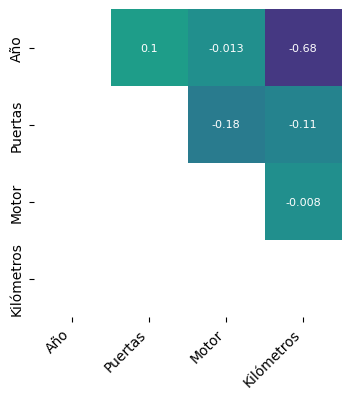

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear el heatmap de la matriz de correlaciones
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))
sns.heatmap(
    corr_matrix,
    annot=True,
    cbar=False,
    annot_kws={"size": 8},
    vmin=-1, vmax=1,
    center=0,
    cmap="viridis",
    square=True,
    ax=ax
)

# Rotar las etiquetas del eje x para una mejor visualización
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right',
)
ax.tick_params(labelsize=10)  # Ajustar el tamaño de las etiquetas
plt.show()


<br>

**Gráfico de distribución para cada variable numérica**

Los gráficos de distribución son fundamentales en el análisis de datos ya que permiten visualizar cómo se distribuyen los valores de las variables numéricas, utilizando histogramas y curvas de densidad. Gracias a ellos, es posible identificar la forma de la distribución y determinar si los datos siguen un patrón normal, presentan sesgos o anomalías. Esto es vital para elegir el modelo estadístico adecuado, ya que algunas técnicas requieren que los datos se distribuyan de manera normal.

Además, estos gráficos son esenciales para detectar valores atípicos que podrían influir en los resultados del análisis. Al comparar las distribuciones de múltiples variables, se pueden descubrir relaciones y diferencias significativas que no serían evidentes en un análisis numérico puro.

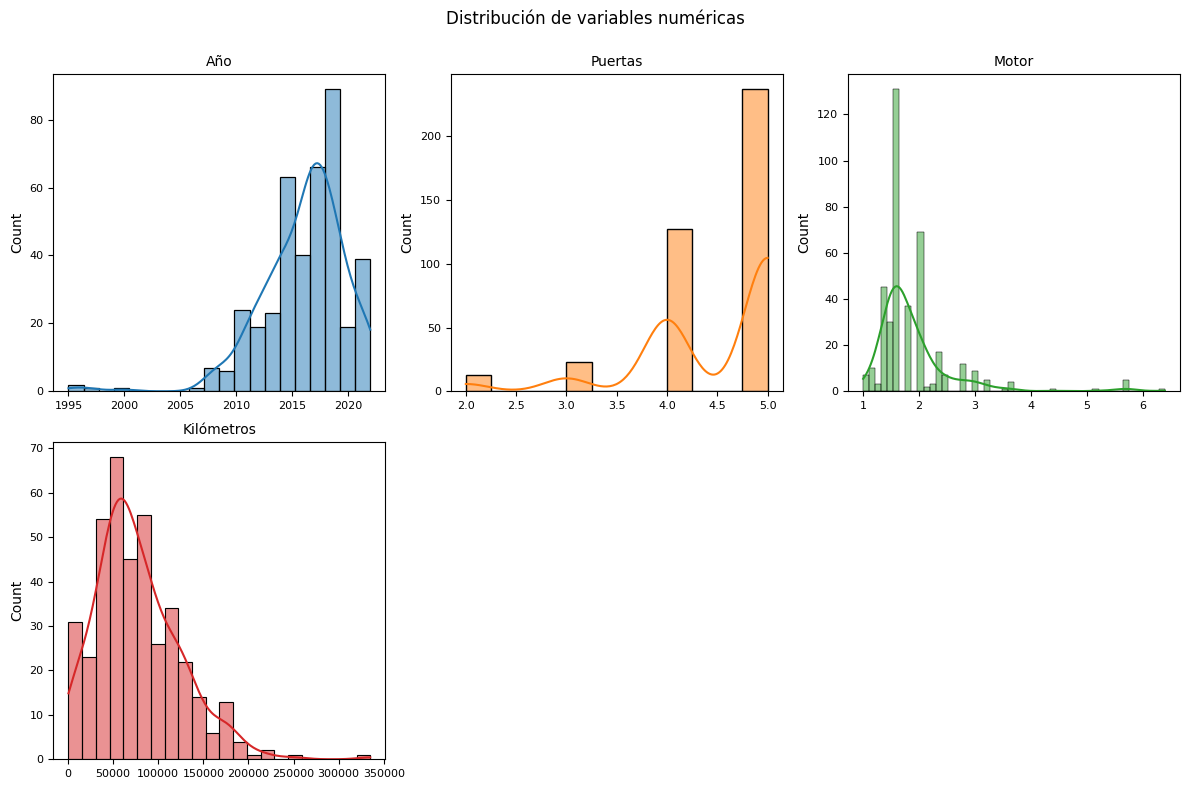

In [ ]:
# Ajustar número de subplots en función del número de columnas numéricas
n_cols = 3  # Número de columnas de subplots
n_rows = int(np.ceil(len(columnas_numericas) / n_cols))  # Número de filas
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 4 * n_rows))
axes = axes.flatten()

# Generar un histograma y KDE para cada variable numérica
for i, colum in enumerate(columnas_numericas):
    sns.histplot(
        data=X_train,
        x=colum,
        stat="count",
        kde=True,
        color=(list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        ax=axes[i]
    )
    axes[i].set_title(colum, fontsize=10)
    axes[i].tick_params(labelsize=8)
    axes[i].set_xlabel("")

# Eliminar ejes sobrantes
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

# Ajustar el diseño de la figura
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución de variables numéricas', fontsize=12)
plt.show()


<br>

##Ajuste del modelo

<br>

**Ajuste del modelo utilizando el modo fórmula (similar a R)**

El ajuste del modelo utilizando el modo fórmula, similar a la sintaxis de R, se llevó a cabo mediante la biblioteca Statsmodels. En este proceso, se creó un nuevo DataFrame que incluye la variable dependiente "precio" y las variables independientes representadas como variables dummy. Esto es fundamental, ya que permite la inclusión de variables categóricas en el modelo, lo cual es esencial para una regresión lineal múltiple.

El modelo fue definido utilizando la fórmula 'precio ~ .', donde el punto (.) indica que se deben incluir todas las variables del DataFrame como predictores.

In [ ]:
import pandas as pd
import statsmodels.formula.api as smf

# Convertir las variables categóricas en variables dummy
data_dummies = pd.get_dummies(data, drop_first=True)

# Definir las variables independientes y la dependiente
X = data_dummies.drop('precio', axis=1)  # Asegúrate de que 'precio' esté en minúsculas
y = data_dummies['precio']

# Combinar X y y para el ajuste del modelo
datos_train = X.assign(precio=y).copy()

# Crear la fórmula
formula = 'precio ~ ' + ' + '.join(X.columns)

# Ajustar el modelo
modelo = smf.ols(formula=formula, data=datos_train)
modelo_res = modelo.fit()

# Mostrar resultados
print(modelo_res.summary())


                            OLS Regression Results                            
Dep. Variable:                 precio   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     19.83
Date:                Sun, 27 Oct 2024   Prob (F-statistic):          4.23e-108
Time:                        13:44:05   Log-Likelihood:                -5184.4
No. Observations:                 500   AIC:                         1.073e+04
Df Residuals:                     319   BIC:                         1.149e+04
Df Model:                         180                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


Los resultados de la regresión indican un R-squared de 0.918, lo que sugiere que aproximadamente el 91.8% de la variabilidad del precio puede ser explicada por las variables independientes en el modelo. Además, el valor ajustado de R-squared de 0.872 indica que, al ajustar por el número de predictores, el modelo sigue siendo robusto y explica una gran parte de la variabilidad en los precios.

El F-statistic de 19.83, junto con su valor de probabilidad muy bajo (4.23e-108), sugiere que el modelo en su conjunto es significativo, lo que implica que al menos una de las variables independientes tiene un efecto real sobre el precio. Sin embargo, el modelo presenta un alto número de variables independientes (180), lo que puede resultar en problemas de multicolinealidad, tal como lo indica la advertencia sobre el valor propio más pequeño en los resultados.

Estos hallazgos resaltan la importancia de la selección de variables y la evaluación del modelo, ya que una alta cantidad de predictores puede introducir complicaciones en la interpretación y en la estabilidad del modelo. La inclusión de análisis adicionales, como la verificación de la multicolinealidad y la evaluación de los supuestos de la regresión, es fundamental para asegurar la validez y la aplicabilidad de los resultados obtenidos.



<br>

**Ajuste del modelo utilizando matrices X, y (similar a scikit-learn)**

Para el ajuste del modelo de regresión lineal múltiple, se utilizó la biblioteca Statsmodels, siguiendo un enfoque que permite definir claramente las matrices de entrada. La matriz 𝑋 se configuró para incluir todas las variables independientes, convirtiendo las variables categóricas en variables dummy para su correcta interpretación por parte del modelo. La matriz
𝑦, por su parte, contiene los valores de la variable dependiente, en este caso, el "precio".

El modelo se ajustó utilizando la función OLS (Ordinary Least Squares) de Statsmodels con la sintaxis OLS(y_train, X_train). Esta función es compatible con matrices de NumPy y DataFrames de Pandas, ase

In [ ]:
import statsmodels.api as sm

# Verificar y convertir columnas booleanas a enteros en X_train
X_train = X_train.astype({col: 'int' for col in X_train.select_dtypes(include='bool').columns})

# Asegurarse de que las dimensiones coincidan
if X_train.shape[0] != y_train.shape[0]:
    raise ValueError("El número de filas en X_train y y_train no coincide.")

# Ajustar el modelo OLS
modelo = sm.OLS(endog=y_train, exog=X_train)
modelo_res = modelo.fit()

# Mostrar el resumen del modelo
print(modelo_res.summary())


                            OLS Regression Results                            
Dep. Variable:                 precio   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     19.83
Date:                Sun, 27 Oct 2024   Prob (F-statistic):          4.23e-108
Time:                        14:38:53   Log-Likelihood:                -5184.4
No. Observations:                 500   AIC:                         1.073e+04
Df Residuals:                     319   BIC:                         1.149e+04
Df Model:                         180                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
intercept       

<br>

##Selección de los mejores predictores

<br>
**Funciones de selección forward y backward para modelos lineales de statsmodels**

Para **mejorar la precisión y eficiencia de los modelos predictivos** en la etapa de entrenamiento, es crucial identificar los mejores predictores de una variable objetivo. Dos técnicas comunes de selección de características, selección hacia adelante y selección hacia atrás , serán aplicadas utilizando modelos lineales de statsmodels . Estas técnicas incrementales permiten determinar qué variables contribuyen significativamente al modelo:
<br> <br>



* **Forward Selection(Selección hacia adelante)** : comienza con un modelo vacío y agrega progresivamente las variables más significativas para la mejorar la capacidad predictiva del modelo, utilizando métricas de evaluación como AIC, BIC o R-cuadrado ajustado. El proceso se detiene cuando no se encuentran mejoras significativas al añadir nuevas variables.

* **Backward Selection(Selección hacia atrás)** : parte de un modelo completo y  iterativamente las menos relevantes, basándose en la misma métrica de evaluación. El proceso continúa hasta que no se obtiene una mejora notable al quitar variables.
<br>
<br>


Ambos métodos ofrecen enfoques complementarios para **reducir la complejidad del modelo y mejorar la interpretabilidad y rendimiento**, y para eso se definen dos funciones, *forward_selection* y *backward_selection*, que se utilizan para seleccionar automáticamente las variables.

In [ ]:
import statsmodels.api as sm

def forward_selection(
    X: pd.DataFrame,
    y: pd.Series,
    criterio: str='aic',
    add_constant: bool=True,
    verbose: bool=True
)-> list:

    """
    Realiza un procedimiento de selección de variables hacia adelante (forward)
    utilizando como criterio de bondad la métrica especificada. El procedimiento
    se detiene cuando no es posible mejorar más el modelo añadiendo variables.

    Parameters
    ----------
    X: pd.DataFrame
        Matriz de predictores
    y: pd.Series
        Variable respuesta
    criterio: str, default='aic'
        Métrica utilizada para seleccionar las variables. Debe ser una de las
        siguientes opciones: 'aic', 'bic', 'rsquared_adj'.
    add_constant: bool, default=True
        Si `True` añade una columna de 1s a la matriz de predictores con el
        con el nombre de intercept.
    verbose: bool, default=True
        Si `True` muestra por pantalla los resultados de cada iteración.

    Returns
    -------
    seleccion: list
        Lista con las variables seleccionadas.
    """

    if add_constant:
        X = sm.add_constant(X, prepend=True).rename(columns={'const':'intercept'})

    restantes = X.columns.to_list()
    seleccion = []
    if criterio == 'rsquared_adj':
        mejor_metrica = -np.inf
        ultima_metrica = -np.inf
    else:
        mejor_metrica = np.inf
        ultima_metrica = np.inf

    while restantes:
        metricas = []
        for candidata in restantes:
            seleccion_temp = seleccion + [candidata]
            modelo  = sm.OLS(endog=y, exog=X[seleccion_temp])
            modelo_res = modelo.fit()
            metrica = getattr(modelo_res, criterio)
            metricas.append(metrica)
        if criterio == 'rsquared_adj':
            mejor_metrica = max(metricas)
            if mejor_metrica > ultima_metrica:
                mejor_variable = restantes[np.argmax(metricas)]
            else:
                break
        else:
            mejor_metrica = min(metricas)
            if mejor_metrica < ultima_metrica:
                mejor_variable = restantes[np.argmin(metricas)]
            else:
                break

        seleccion.append(mejor_variable)
        restantes.remove(mejor_variable)
        ultima_metrica = mejor_metrica

        if verbose:
            print(f'variables: {seleccion} | {criterio}: {mejor_metrica:.3f}')

    return sorted(seleccion)


def backward_selection(
    X: pd.DataFrame,
    y: pd.Series,
    criterio: str='aic',
    add_constant: bool=True,
    verbose: bool=True
)-> list:

    """
    Realiza un procedimiento de selección de variables hacia atrás (backward)
    utilizando como criterio de bondad la métrica especificada. El procedimiento
    se detiene cuando no es posible mejorar más el modelo eliminando variables.

    Parameters
    ----------
    X: pd.DataFrame
        Matriz de predictores
    y: pd.Series
        Variable respuesta
    criterio: str, default='aic'
        Métrica utilizada para seleccionar las variables. Debe ser una de las
        siguientes opciones: 'aic', 'bic', 'rsquared_adj'.
    add_constant: bool, default=True
        Si `True` añade una columna de 1s a la matriz de predictores con el
        con el nombre de intercept.
    verbose: bool, default=True
        Si `True` muestra por pantalla los resultados de cada iteración.

    Returns
    -------
    seleccion: list
        Lista con las variables seleccionadas.
    """

    if add_constant:
        X = sm.add_constant(X, prepend=True).rename(columns={'const':'intercept'})

    # Se inicia con todas las variables como predictores
    seleccion = X.columns.to_list()
    modelo  = sm.OLS(endog=y, exog=X[seleccion])
    modelo_res = modelo.fit()
    ultima_metrica = getattr(modelo_res, criterio)
    mejor_metrica = ultima_metrica
    if verbose:
            print(f'variables: {seleccion} | {criterio}: {mejor_metrica:.3f}')

    while seleccion:
        metricas = []
        for candidata in seleccion:
            seleccion_temp = seleccion.copy()
            seleccion_temp.remove(candidata)
            modelo  = sm.OLS(endog=y, exog=X[seleccion_temp])
            modelo_res = modelo.fit()
            metrica = getattr(modelo_res, criterio)
            metricas.append(metrica)
        if criterio == 'rsquared_adj':
            mejor_metrica = max(metricas)
            if mejor_metrica > ultima_metrica:
                peor_variable = seleccion[np.argmax(metricas)]
            else:
                break
        else:
            mejor_metrica = min(metricas)
            if mejor_metrica < ultima_metrica:
                peor_variable = seleccion[np.argmin(metricas)]
            else:
                break

        seleccion.remove(peor_variable)
        ultima_metrica = mejor_metrica

        if verbose:
            print(f'variables: {seleccion} | {criterio}: {mejor_metrica:.3f}')

    return sorted(seleccion)


<br>

**Selección de variables hacia forward**

 Ahora, buscaremos automáticamente las variables más importantes para predecir un objetivo usando el método de selección "hacia adelante" (forward selection). Se aplica la función f*orward_selection* a los datos de entrenamiento (X_train, y_train) y **se usa** el criterio **AIC** para guiar la selección. Finalmente, imprimimos la lista de variables que el algoritmo ha identificado como las mejores predictoras para el modelo.

In [ ]:
# Aplicar la selección de variables hacia adelante
predictores = forward_selection(
    X=X_train,
    y=y_train,
    criterio='aic',           # Podemos cambiar a 'bic' o 'rsquared_adj' si prefieres
    add_constant=False,
    verbose=True
)

# Mostrar las variables seleccionadas
print("Variables seleccionadas:", predictores)

variables: ['motor'] | aic: 11490.443
variables: ['motor', 'modelo_r8_coup_'] | aic: 11083.903
variables: ['motor', 'modelo_r8_coup_', 'kil_metros'] | aic: 10988.580
variables: ['motor', 'modelo_r8_coup_', 'kil_metros', 'modelo_clase_e'] | aic: 10918.766
variables: ['motor', 'modelo_r8_coup_', 'kil_metros', 'modelo_clase_e', 'modelo_f_150'] | aic: 10850.632
variables: ['motor', 'modelo_r8_coup_', 'kil_metros', 'modelo_clase_e', 'modelo_f_150', 'modelo_serie_2'] | aic: 10797.953
variables: ['motor', 'modelo_r8_coup_', 'kil_metros', 'modelo_clase_e', 'modelo_f_150', 'modelo_serie_2', 'modelo_serie_m'] | aic: 10752.776
variables: ['motor', 'modelo_r8_coup_', 'kil_metros', 'modelo_clase_e', 'modelo_f_150', 'modelo_serie_2', 'modelo_serie_m', 'modelo_serie_4'] | aic: 10711.203
variables: ['motor', 'modelo_r8_coup_', 'kil_metros', 'modelo_clase_e', 'modelo_f_150', 'modelo_serie_2', 'modelo_serie_m', 'modelo_serie_4', 'caja_manual'] | aic: 10682.186
variables: ['motor', 'modelo_r8_coup_', 'ki

Podemos observar cómo el modelo se va mejorando progresivamente al añadir variables de forma incremental. Como dijimos anteriormente, utilizando el AIC (Criterio de Información de Akaike), donde los valores más bajos indican un mejor ajuste del modelo al balancear precisión y simplicidad.

 <br> <br>

* **Progresión** : Al agregar nuevas variables, el AIC disminuye en cada paso, lo que indica que cada variable mejora el ajuste del modelo al reducir el error, sin llevar a un sobreajuste excesivo.
* **Punto final** : La última combinación de variables alcanza un AIC de 10563.238, lo cual indica el modelo con el mejor ajuste dentro de este análisis incremental.
 <br>
  <br>
  
**Conclusión** : Este proceso permite seleccionar el modelo con la menor cantidad de variables y el mejor AIC posible, optimizando tanto el rendimiento del modelo como la simplicidad para evitar sobreajuste.

<br>

**Entrenamiento del modelo con las variables seleccionadas (forward)**

In [ ]:
# Ajustar el modelo final con las variables seleccionadas
modelo_final_forward = sm.OLS(endog=y_train, exog=sm.add_constant(X_train[predictores])).fit()

# Resumen del modelo
print(modelo_final_forward.summary())


                            OLS Regression Results                            
Dep. Variable:                 precio   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     113.7
Date:                Sun, 27 Oct 2024   Prob (F-statistic):          8.68e-204
Time:                        15:07:12   Log-Likelihood:                -5244.7
No. Observations:                 500   AIC:                         1.056e+04
Df Residuals:                     464   BIC:                         1.071e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

**Interpretación de los resultados:** En el modelo de selección hacia adelante, se incluyeron solo las variables más significativas de forma incremental, lo que resultó en un ajuste sólido con un R-cuadrado de 0.896, indicando que el 89.6% de la variabilidad en el precio está explicado por el modelo. . El estadístico F de 113.7 sugiere que las variables incluidas son estadísticamente significativas en conjunto, y el valor ajustado del R cuadrado de 0.888 muestra una alta capacidad explicativa sin un exceso de variables. Además, los criterios AIC y BIC, de 1.056e+04 y 1.071e+04, reflejan un buen ajuste sin demasiado compl.

<br>

**Selección de variables hacia backward**

In [ ]:
# Aplicar la selección de variables hacia atrás
predictores = backward_selection(
    X=X_train,
    y=y_train,
    criterio='aic',           # Puedes cambiar a 'bic' o 'rsquared_adj' si prefieres
    add_constant=False,
    verbose=True
)

# Mostrar las variables seleccionadas
print("Variables seleccionadas:", predictores)


variables: ['intercept', 'a_o', 'puertas', 'motor', 'kil_metros', 'marca_bmw', 'marca_baic', 'marca_chery', 'marca_chevrolet', 'marca_citro_n', 'marca_ds', 'marca_dodge', 'marca_fiat', 'marca_ford', 'marca_honda', 'marca_hyundai', 'marca_jeep', 'marca_kia', 'marca_mercedes_benz', 'marca_mini', 'marca_mitsubishi', 'marca_nissan', 'marca_peugeot', 'marca_ram', 'marca_renault', 'marca_subaru', 'marca_suzuki', 'marca_toyota', 'marca_volkswagen', 'marca_volvo', 'modelo_2008', 'modelo_207', 'modelo_208', 'modelo_220', 'modelo_3008', 'modelo_308', 'modelo_408', 'modelo_500', 'modelo_5008', 'modelo_500x', 'modelo_504', 'modelo_960', 'modelo_a1', 'modelo_a3_sportback', 'modelo_a4', 'modelo_aircross', 'modelo_amarok', 'modelo_argo', 'modelo_aveo', 'modelo_berlingo', 'modelo_bora', 'modelo_c_elys_e', 'modelo_c3', 'modelo_c3_picasso', 'modelo_c30', 'modelo_c4', 'modelo_c4_cactus', 'modelo_c4_lounge', 'modelo_c4_spacetourer', 'modelo_cr_v', 'modelo_camry', 'modelo_captur', 'modelo_celta', 'modelo_c

Observamos, que **Backward** comenzó con todas las variables en el modelo y luego, mediante selección, eliminó las menos significativas una por una. En cada paso se evaluó el impacto de la eliminación en el AIC (Criterio de Información de Akaike). El objetivo era lograr un modelo más parsimonioso, es decir, con menos variables, sin que esto implicara una pérdida significativa de precisión en la predicción.
<br>

En el modelo final, se seleccionan las siguientes variables:
<br>


**Variables principales :** 'año', 'motor', 'kilómetros', 'intercept', y varias dummies relacionadas con marca, modelo, color, carrocería y combustible.

**Variables de marca y modelo :** Se eligieron Múltiples marcas y modelos que mostraron una contribución significativa en el ajuste. Esto incluye variables como 'marca_bmw', 'marca_chevrolet', 'marca_ford', y modelos específicos como 'modelo_2008', 'modelo_civic', entre otros.

**Variables de características :** 'color_blanco', 'combustible_híbrido_nafta', y varios dummies de carrocería como 'carrocería_pick_up', 'carrocería_suv'fueron relevantes para el modelo.
<br>
<br>


El modelo resultante tiene un **AIC final de 10705.234** , indicando una ligera mejora en comparación con la configuración inicial, lo cual sugiere una mejor capacidad de ajuste y simplicidad sin comprometer el rendimiento predictivo.

<br>

**Entrenamiento del modelo con las variables seleccionadas (backward)**

In [ ]:
# Ajustar el modelo final con las variables seleccionadas
modelo_final_backward = sm.OLS(endog=y_train, exog=sm.add_constant(X_train[predictores])).fit()

# Resumen del modelo
print(modelo_final_backward.summary())


                            OLS Regression Results                            
Dep. Variable:                 precio   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     22.86
Date:                Sun, 27 Oct 2024   Prob (F-statistic):          4.64e-119
Time:                        15:54:20   Log-Likelihood:                -5190.6
No. Observations:                 500   AIC:                         1.071e+04
Df Residuals:                     338   BIC:                         1.139e+04
Df Model:                         161                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
a_o             

**Interpretación de los resultados:** El modelo de selección hacia atrás, por su parte, comenzó con todas las variables y eliminó las menos significativas hasta dejar las más relevantes. Aquí, el R-cuadrado es ligeramente mayor (0.916), mostrando que el 91.6% de la variabilidad del precio está explicado, pero el R-cuadrado ajustado es más bajo (0.876), indicando que este modelo puede estar capturando ruido o redundancia. Los valores de AIC y BIC son 1.071e+04 y 1.139e+04, respectivamente, ligeramente más altos que en el modelo forward, lo cual sugiere que el forward es más complejo y menos parsimonioso.

<br>



<br>

**Sequential Feature Selector (SFS)**

Después de realizar las selecciones forward y backward, el Sequential Feature Selector toma el modelo resultante y selecciona automáticamente la combinación de variables que optimiza el rendimiento (en este caso, usando R^2 en vez de AIC).

<br>

SFS aplica **validación cruzada** para asegurar que las variables seleccionadas tengan un impacto positivo en la predicción y que la elección sea generalizable, es decir, que funcione bien también en datos nuevos.

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

# Inicializa el modelo de regresión lineal
modelo = LinearRegression()

# Inicializa el selector secuencial de características
sfs = SequentialFeatureSelector(
    modelo,
    n_features_to_select='auto',  # Selecciona automáticamente el número de características
    direction='forward',           # Selección hacia adelante
    scoring='r2',                  # Métrica a usar
    cv=5                           # Validación cruzada con 5 pliegues
)

# Ajustar el selector con los datos de entrenamiento
sfs.fit(X_train, y_train)

# Obtener los nombres de las características seleccionadas
caracteristicas_seleccionadas = sfs.get_feature_names_out().tolist()
print("Características seleccionadas:", caracteristicas_seleccionadas)


Características seleccionadas: ['a_o', 'puertas', 'motor', 'kil_metros', 'marca_bmw', 'marca_chevrolet', 'marca_citro_n', 'marca_dodge', 'marca_fiat', 'marca_mercedes_benz', 'marca_mini', 'marca_nissan', 'marca_peugeot', 'marca_renault', 'marca_suzuki', 'modelo_2008', 'modelo_220', 'modelo_3008', 'modelo_308', 'modelo_500x', 'modelo_504', 'modelo_960', 'modelo_a4', 'modelo_argo', 'modelo_berlingo', 'modelo_bora', 'modelo_c_elys_e', 'modelo_c3', 'modelo_c3_picasso', 'modelo_c4_cactus', 'modelo_c4_lounge', 'modelo_cr_v', 'modelo_captur', 'modelo_cerato', 'modelo_clase_a', 'modelo_clase_c', 'modelo_clase_e', 'modelo_clio', 'modelo_corolla', 'modelo_creta', 'modelo_cronos', 'modelo_ds4', 'modelo_duster', 'modelo_duster_oroch', 'modelo_etios', 'modelo_f_100', 'modelo_f_150', 'modelo_fiesta_kinetic_design', 'modelo_fiorino', 'modelo_fit', 'modelo_focus_ii', 'modelo_focus_iii', 'modelo_gol_trend', 'modelo_grand_cherokee', 'modelo_hr_v', 'modelo_jumper', 'modelo_ka', 'modelo_kicks', 'modelo_l2

Con esta selección de características, tenemos un conjunto reducido de variables que son las más significativas para la predicción, obtenidas mediante el SequentialFeatureSelectoruso de selección hacia adelante ( forward selección ). Esto ayuda a reducir la complejidad del modelo sin sacrificar precisión en la predicción.

<br>

##Diagnóstico de los resíduos

El diagnóstico de los residuos es una etapa crucial en la evaluación de la calidad del modelo de regresión, ya que permite verificar si las suposiciones del modelo se cumplen y, por tanto, si sus predicciones son confiables.

<br>

En este paso, se analiza el comportamiento de los residuos, es decir, la diferencia entre los valores reales y los predichos por el modelo. Idealmente, los residuos deben mostrar ciertas características clave:

<br>

1. **Distribución Normal :** Los residuos deben aproximarse a una distribución normal. Esto indica que el modelo está haciendo predicciones centradas en los valores reales sin sesgo sistemático.
<br>

2. **Independencia y Homocedasticidad :** Los residuos deben ser independientes unos de otros y tener una variación constante a lo largo de los valores predichos. Esto asegura que el modelo tenga un rendimiento constante en toda su gama de predicciones.

<br>

3. **Ausencia de Patrones:** No debería haber patrones evidentes en los residuos. Si existen patrones, podría indicar que el modelo no está capturando correctamente algunas relaciones en los datos.

<br>

Realizar un diagnóstico de los residuos nos permite ajustar el modelo si se detectan problemas, y mejorar así su capacidad predictiva y confiabilidad.

In [ ]:
# Calcular los residuos
residuos = modelo_final_backward.resid

# Agregar la constante a los datos de entrenamiento para la predicción
X_train_const = sm.add_constant(X_train[predictores])

# Realizar predicciones en los datos de entrenamiento
prediccion_train = modelo_final_backward.predict(X_train_const)

# Mostrar los resultados
print("Residuos:", residuos)
print("Predicciones de entrenamiento:", prediccion_train)


Residuos: 0     -3740.77
1       506.82
2     -4073.36
3     12797.66
4        -0.00
        ...   
495   -3042.35
496    7051.59
497    2420.86
498    6189.87
499     846.79
Length: 500, dtype: float64
Predicciones de entrenamiento: 0     32293.40
1     34993.18
2     19336.52
3     21702.34
4     25000.00
        ...   
495   16858.14
496   38948.41
497    8000.19
498   38710.13
499    6758.47
Length: 500, dtype: float64


Los residuos representan la diferencia entre el valor real (observado) de la variable objetivo (en este caso, probablemente el precio de un auto) y el valor predicho por el modelo para cada una de las 500 observaciones en tu conjunto de entrenamiento.

* **Valores negativos:** Indican que el modelo sobreestimó el valor real. Por ejemplo, en la primera observación (índice 0), el modelo predijo un precio 3740.77 unidades más alto que el precio real.

* **Valores positivos:** Indican que el modelo subestimó el valor real. En la segunda observación (índice 1), el modelo predijo un precio 506.82 unidades más bajo que el precio real.
Valor cercano a cero: Sugiere que la predicción del modelo fue muy cercana al valor real.

**Predicciones de entrenamiento:**
Para un análisis más profundo, sería ideal visualizar los residuos:



**Gráficos de Residuos**

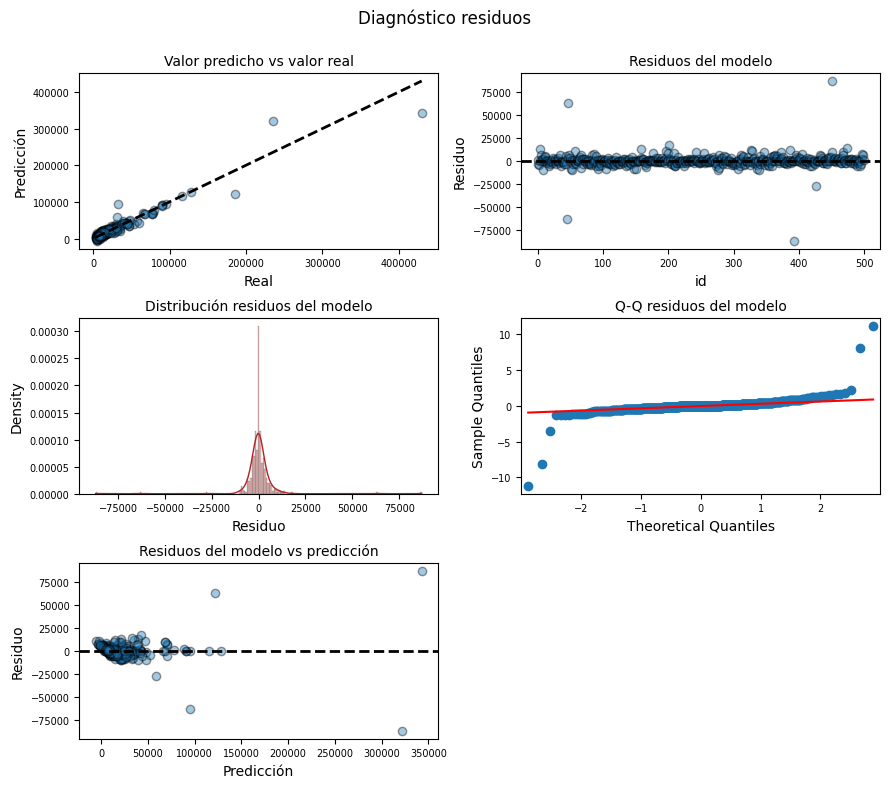

In [ ]:
# Crear la figura y los ejes para los gráficos
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

# Gráfico 1: Valor predicho vs valor real
axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha=0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize=10)
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize=7)

# Gráfico 2: Residuos del modelo
axes[0, 1].scatter(list(range(len(y_train))), residuos, edgecolors=(0, 0, 0), alpha=0.4)
axes[0, 1].axhline(y=0, linestyle='--', color='black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize=10)
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize=7)

# Gráfico 3: Distribución de los residuos del modelo
sns.histplot(
    data=residuos,
    stat="density",
    kde=True,
    line_kws={'linewidth': 1},
    color="firebrick",
    alpha=0.3,
    ax=axes[1, 0]
)
axes[1, 0].set_title('Distribución residuos del modelo', fontsize=10)
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize=7)

# Gráfico 4: Gráfico Q-Q de residuos
sm.qqplot(
    residuos,
    fit=True,
    line='q',
    ax=axes[1, 1]
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize=10)
axes[1, 1].tick_params(labelsize=7)

# Gráfico 5: Residuos vs predicción
axes[2, 0].scatter(prediccion_train, residuos, edgecolors=(0, 0, 0), alpha=0.4)
axes[2, 0].axhline(y=0, linestyle='--', color='black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize=10)
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize=7)

# Eliminar el eje vacío en la última fila, segunda columna
fig.delaxes(axes[2, 1])

# Ajustar diseño para evitar superposiciones
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize=12)

# Mostrar gráficos
plt.show()


<br>

**Test de normalidad**

In [ ]:
from scipy import stats

# Test de normalidad Shapiro-Wilk
shapiro_test = stats.shapiro(residuos)
print(f"Test Shapiro-Wilk: estadístico = {shapiro_test[0]:.4f}, p-value = {shapiro_test[1]:.4f}")

# Test de normalidad D'Agostino's K-squared
k2, p_value = stats.normaltest(residuos)
print(f"Test D'Agostino's K-squared: estadístico = {k2:.4f}, p-value = {p_value:.4f}")

# Interpretar los resultados
alpha = 0.05  # Nivel de significancia
if shapiro_test[1] < alpha:
    print("Rechazamos la hipótesis nula del test de Shapiro-Wilk: los residuos no son normales.")
else:
    print("No se rechaza la hipótesis nula del test de Shapiro-Wilk: los residuos son normales.")

if p_value < alpha:
    print("Rechazamos la hipótesis nula del test de D'Agostino's K-squared: los residuos no son normales.")
else:
    print("No se rechaza la hipótesis nula del test de D'Agostino's K-squared: los residuos son normales.")


Test Shapiro-Wilk: estadístico = 0.4597, p-value = 0.0000
Test D'Agostino's K-squared: estadístico = 212.2582, p-value = 0.0000
Rechazamos la hipótesis nula del test de Shapiro-Wilk: los residuos no son normales.
Rechazamos la hipótesis nula del test de D'Agostino's K-squared: los residuos no son normales.


In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Realizar el test de Breusch-Pagan
bp_test = het_breuschpagan(residuos, modelo_final_backward.model.exog)
labels = ['LM Stat', 'LM p-value', 'F Stat', 'F p-value']
bp_results = dict(zip(labels, bp_test))
print(bp_results)


{'LM Stat': 497.69619617242574, 'LM p-value': 7.707159121646827e-30, 'F Stat': 453.53379110846146, 'F p-value': 0.0}


<br>

##Multicolinealidad (Inflación de varianza VIF)

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Suponiendo que modelo_final_backward es tu modelo ajustado
def calcular_vif(modelo):
    X = modelo.model.exog  # Obtener la matriz de diseño del modelo
    vif = pd.DataFrame()
    vif["Variable"] = modelo.model.exog_names  # Obtener los nombres de las variables
    vif["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
    return vif

# Calcular el VIF para tu modelo
vif_resultados = calcular_vif(modelo_final_backward)
print(vif_resultados)


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


                   Variable   VIF
0                       a_o  7.00
1      carrocer_a_crossover   inf
2         carrocer_a_furg_n   inf
3        carrocer_a_minivan   inf
4    carrocer_a_monovolumen   inf
..                      ...   ...
184               modelo_x5   inf
185              modelo_x55   inf
186               modelo_xv   inf
187            modelo_yaris   inf
188                   motor 14.77

[189 rows x 2 columns]


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Crear un preprocesador que aplica One-Hot Encoding a las variables categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), columnas_numericas),  # Estandarizar columnas numéricas
        ('cat', OneHotEncoder(handle_unknown='ignore'), columnas_categoricas)  # Codificar columnas categóricas
    ],
    remainder='drop'  # Mantener solo las columnas transformadas
)

# Crear el modelo de regresión Lasso dentro de un Pipeline
modelo_regresion = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=1))  # Usar el mejor valor de alpha
])

# Dividir el conjunto de datos en entrenamiento y prueba
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo
try:
    modelo_regresion.fit(X_entrenamiento, y_entrenamiento)
except Exception as e:
    print(f"Error al entrenar el modelo: {e}")

# Hacer predicciones
try:
    y_predicciones = modelo_regresion.predict(X_prueba)
except Exception as e:
    print(f"Error al hacer predicciones: {e}")

# Evaluar el modelo
mse = mean_squared_error(y_prueba, y_predicciones)
mae = mean_absolute_error(y_prueba, y_predicciones)
r2 = r2_score(y_prueba, y_predicciones)

# Imprimir resultados de evaluación
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.2f}")


MSE: 613144170.38
MAE: 7219.62
R²: 0.73


<br>

**Definición del preprocesador**

Se configura un preprocesador utilizando ColumnTransformer, una herramienta esencial para aplicar transformaciones específicas a diferentes columnas de un dataframe. Este enfoque es fundamental para preparar los datos antes del entrenamiento del modelo, asegurando que todas las variables se manejen de manera adecuada.

Para optimizar la precisión del modelo, es crucial estandarizar las variables numéricas, como Año, Puertas, Motor y Kilómetros. Utilizamos StandardScaler, que normaliza los datos de forma que tengan una media de 0 y una desviación estándar de 1. Esta estandarización es vital, ya que evita que el modelo de regresión se vea influenciado por diferencias de escala entre las variables, facilitando un entrenamiento más eficiente y efectivo.

En cuanto a las variables categóricas, aplicamos OneHotEncoder con las opciones drop='first' y handle_unknown='ignore'. Esta técnica transforma las variables categóricas en variables dummy (indicadoras) y elimina una de las categorías para evitar colinealidad. La opción handle_unknown='ignore' gestiona eficazmente las categorías desconocidas que pueden aparecer en el conjunto de prueba, asegurando que el modelo sea robusto y generalizable.

Se implementa una función para agrupar categorías poco frecuentes en una categoría general denominada "Otras". Este enfoque es particularmente valioso en datasets pequeños, donde las categorías poco representadas pueden introducir ruido y afectar negativamente el rendimiento del modelo. Al consolidar estas categorías, se reduce la complejidad del modelo y se mejora su capacidad de generalización a nuevos datos.

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Definir las columnas numéricas y categóricas
columnas_numericas = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
columnas_categoricas = X.select_dtypes(include=['object']).columns.tolist()

# Mostrar las columnas categóricas y numéricas
print("Columnas categóricas:", columnas_categoricas)
print("Columnas numéricas:", columnas_numericas)

# Crear un preprocesador que aplica One-Hot Encoding a las variables categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), columnas_numericas),  # Estandarizar columnas numéricas
        ('cat', OneHotEncoder(handle_unknown='ignore'), columnas_categoricas)  # Codificar columnas categóricas
    ],
    remainder='drop'  # Mantener solo las columnas transformadas
)

# Crear el modelo de regresión Lasso dentro de un Pipeline
modelo_regresion = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=1))  # Usar el mejor valor de alpha
])

# Dividir el conjunto de datos en entrenamiento y prueba
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo
try:
    modelo_regresion.fit(X_entrenamiento, y_entrenamiento)
except Exception as e:
    print(f"Error al entrenar el modelo: {e}")

# Hacer predicciones
try:
    y_predicciones = modelo_regresion.predict(X_prueba)
except Exception as e:
    print(f"Error al hacer predicciones: {e}")

# Evaluar el modelo
mse = mean_squared_error(y_prueba, y_predicciones)
mae = mean_absolute_error(y_prueba, y_predicciones)
r2 = r2_score(y_prueba, y_predicciones)

# Imprimir resultados de evaluación
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.2f}")


Columnas categóricas: ['Marca', 'Modelo', 'Color', 'Combustible', 'Caja', 'Carrocería']
Columnas numéricas: ['Año', 'Puertas', 'Motor', 'Kilómetros']
MSE: 613144170.38
MAE: 7219.62
R²: 0.73

Estadísticas de datos numéricos - Entrenamiento
          Año  Puertas  Motor  Kilómetros
count  400.00   400.00 400.00      400.00
mean  2016.07     4.47   1.88    77186.35
std      3.80     0.75   0.71    47142.40
min   1995.00     2.00   1.00      500.00
25%   2014.00     4.00   1.60    44901.75
50%   2017.00     5.00   1.60    68500.00
75%   2019.00     5.00   2.00   102750.00
max   2022.00     5.00   6.40   335000.00

Estadísticas de datos numéricos - Prueba
          Año  Puertas  Motor  Kilómetros
count  100.00   100.00 100.00      100.00
mean  2017.06     4.49   1.86    64916.39
std      3.22     0.80   0.69    44306.06
min   2009.00     2.00   1.00      500.00
25%   2014.75     4.00   1.50    36000.00
50%   2018.00     5.00   1.60    60000.00
75%   2019.00     5.00   2.00    87250.00
max  

In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Ajustar el preprocesador solo al conjunto de entrenamiento
X_entrenamiento_transformed = preprocessor.fit_transform(X_entrenamiento)

# Obtener los nombres de las características antes de la transformación para asegurar que coincidan con la salida
# Esto asume que tu preprocesador está configurado correctamente
column_names = preprocessor.get_feature_names_out(input_features=X_entrenamiento.columns)

# Verificar si los datos transformados son dispersos y convertirlos a densos si es necesario
# Convertir a un array denso
X_entrenamiento_transformed = X_entrenamiento_transformed.toarray()  # Convert to a dense NumPy array

# Convertir el resultado en un DataFrame
X_entrenamiento_transformed_df = pd.DataFrame(X_entrenamiento_transformed, columns=column_names)

# Calcular el VIF para cada característica
vif = pd.DataFrame()
vif['Característica'] = X_entrenamiento_transformed_df.columns
vif['VIF'] = [variance_inflation_factor(X_entrenamiento_transformed_df.values, i) for i in range(X_entrenamiento_transformed_df.shape[1])]

# Mostrar el VIF
print(vif.sort_values('VIF', ascending=False))


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                Característica   VIF
100           cat__Modelo_HR-V   inf
126         cat__Modelo_Prisma   inf
128       cat__Modelo_R8 Coupé   inf
129           cat__Modelo_RAV4   inf
130         cat__Modelo_Ranger   inf
..                         ...   ...
73   cat__Modelo_Corolla Cross   inf
2                   num__Motor 15.08
0                     num__Año  9.44
1                 num__Puertas  7.82
3              num__Kilómetros  5.21

[200 rows x 2 columns]


In [ ]:
# Obtener los nombres de las características con VIF infinito
vif_infinito = vif[vif['VIF'] == float('inf')]['Característica'].tolist()

# Mostrar las características con VIF infinito
print("Características con VIF infinito:", vif_infinito)

# Puedes decidir eliminar una o más de estas características del conjunto de datos original
X_reducido = X.drop(columns=vif_infinito, errors='ignore')

# Luego, vuelve a procesar los datos y calcula el VIF de nuevo
X_entrenamiento_transformed_reducido = preprocessor.fit_transform(X_reducido)
# Y continúa con el cálculo del VIF como lo hiciste antes.


Características con VIF infinito: ['cat__Marca_Audi', 'cat__Marca_BMW', 'cat__Marca_Baic', 'cat__Marca_Chery', 'cat__Marca_Chevrolet', 'cat__Marca_Citroën', 'cat__Marca_DS', 'cat__Marca_Dodge', 'cat__Marca_Fiat', 'cat__Marca_Ford', 'cat__Marca_Honda', 'cat__Marca_Hyundai', 'cat__Marca_Jeep', 'cat__Marca_Kia', 'cat__Marca_Mercedes-Benz', 'cat__Marca_Mini', 'cat__Marca_Mitsubishi', 'cat__Marca_Nissan', 'cat__Marca_Peugeot', 'cat__Marca_RAM', 'cat__Marca_Renault', 'cat__Marca_Subaru', 'cat__Marca_Suzuki', 'cat__Marca_Toyota', 'cat__Marca_Volkswagen', 'cat__Marca_Volvo', 'cat__Modelo_1500', 'cat__Modelo_2008', 'cat__Modelo_207', 'cat__Modelo_208', 'cat__Modelo_220', 'cat__Modelo_3008', 'cat__Modelo_308', 'cat__Modelo_408', 'cat__Modelo_500', 'cat__Modelo_5008', 'cat__Modelo_500X', 'cat__Modelo_504', 'cat__Modelo_960', 'cat__Modelo_A1', 'cat__Modelo_A3 Sportback', 'cat__Modelo_A4', 'cat__Modelo_Aircross', 'cat__Modelo_Amarok', 'cat__Modelo_Aveo', 'cat__Modelo_Berlingo', 'cat__Modelo_Bora', 

<br>


In [ ]:
# Eliminar la primera categoría de cada variable categórica
categorical_columns = ['Marca', 'Modelo', 'Color', 'Combustible', 'Caja', 'Carrocería']

# Crear un nuevo DataFrame sin la primera categoría
X_reducido = X.drop(columns=[col for col in X.columns if col.startswith('cat__') and col.endswith('_0')], errors='ignore')

# Vuelve a procesar y calcular el VIF
X_entrenamiento_transformed_reducido = preprocessor.fit_transform(X_reducido)

# Convertir a un DataFrame
column_names_reducido = preprocessor.get_feature_names_out(input_features=X_reducido.columns)

# Fix: Converting to dense NumPy array to ensure correct shape
X_entrenamiento_transformed_reducido = X_entrenamiento_transformed_reducido.toarray()

X_entrenamiento_transformed_reducido = pd.DataFrame(X_entrenamiento_transformed_reducido, columns=column_names_reducido)

# Calcular el VIF nuevamente
vif_reducido = pd.DataFrame()
vif_reducido['Característica'] = X_entrenamiento_transformed_reducido.columns
vif_reducido['VIF'] = [variance_inflation_factor(X_entrenamiento_transformed_reducido.values, i) for i in range(X_entrenamiento_transformed_reducido.shape[1])]

# Mostrar el nuevo VIF
print(vif_reducido.sort_values('VIF', ascending=False))


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                Característica   VIF
106        cat__Modelo_Journey   inf
134           cat__Modelo_Qubo   inf
136           cat__Modelo_RAV4   inf
137         cat__Modelo_Ranger   inf
138  cat__Modelo_Ranger Raptor   inf
..                         ...   ...
78           cat__Modelo_Creta   inf
2                   num__Motor 15.94
1                 num__Puertas  9.21
0                     num__Año  8.04
3              num__Kilómetros  4.83

[213 rows x 2 columns]


In [ ]:
# Filtrar variables con VIF infinito
variables_a_eliminar = vif_resultados[vif_resultados['VIF'] == float('inf')]['Variable']

# Crear un nuevo DataFrame sin las variables a eliminar
X_train_sin_multicolinealidad = X_train.drop(columns=variables_a_eliminar)

# Ajustar el modelo nuevamente
modelo_final_sin_multicolinealidad = sm.OLS(y_train, sm.add_constant(X_train_sin_multicolinealidad)).fit()

# Volver a calcular el VIF
vif_resultados_sin_multicolinealidad = calcular_vif(modelo_final_sin_multicolinealidad)
print(vif_resultados_sin_multicolinealidad)


                     Variable       VIF
0                   intercept 703778.31
1                         a_o      2.36
2                     puertas      1.33
3                       motor      1.37
4                  kil_metros      2.17
5                 color_beige      1.06
6                color_blanco      5.01
7               color_celeste      1.16
8                color_dorado      1.31
9                  color_gris      5.29
10          color_gris_oscuro      1.09
11               color_marr_n      1.25
12              color_naranja      1.13
13                color_negro      3.09
14             color_plateado      2.83
15                 color_rojo      1.91
16                color_verde      1.09
17              color_violeta      1.18
18  combustible_h_brido_nafta      1.11
19          combustible_nafta      1.71
20      combustible_nafta_gnc      1.41
21                caja_manual      1.25
22       carrocer_a_hatchback      1.69
23           carrocer_a_rural      1.18


In [ ]:
# Variables a eliminar
variables_a_eliminar_vif = ['color_blanco', 'color_gris']

# Crear un nuevo DataFrame sin las variables a eliminar
X_train_final = X_train_sin_multicolinealidad.drop(columns=variables_a_eliminar_vif)

# Ajustar el modelo nuevamente
modelo_final_vif_reducido = sm.OLS(y_train, sm.add_constant(X_train_final)).fit()

# Volver a calcular el VIF
vif_resultados_final = calcular_vif(modelo_final_vif_reducido)
print(vif_resultados_final)


                     Variable       VIF
0                   intercept 684977.76
1                         a_o      2.29
2                     puertas      1.30
3                       motor      1.37
4                  kil_metros      2.14
5                 color_beige      1.02
6               color_celeste      1.01
7                color_dorado      1.01
8           color_gris_oscuro      1.01
9                color_marr_n      1.11
10              color_naranja      1.01
11                color_negro      1.09
12             color_plateado      1.06
13                 color_rojo      1.07
14                color_verde      1.01
15              color_violeta      1.02
16  combustible_h_brido_nafta      1.11
17          combustible_nafta      1.71
18      combustible_nafta_gnc      1.41
19                caja_manual      1.24
20       carrocer_a_hatchback      1.67
21           carrocer_a_rural      1.18
22           carrocer_a_sed_n      1.44


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Ajustar el modelo nuevamente
modelo_final_vif_reducido = sm.OLS(y_train, sm.add_constant(X_train_final)).fit()

# Resumen del modelo ajustado
print(modelo_final_vif_reducido.summary())

# Evaluar el rendimiento del modelo
# Predicciones sobre los datos de entrenamiento
y_train_pred = modelo_final_vif_reducido.predict(sm.add_constant(X_train_final))

# Calcular métricas de rendimiento
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_train, y_train_pred)

print(f"RMSE: {rmse}")
print(f"R²: {r_squared}")


                            OLS Regression Results                            
Dep. Variable:                 precio   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     18.39
Date:                Sun, 27 Oct 2024   Prob (F-statistic):           2.18e-50
Time:                        16:49:39   Log-Likelihood:                -5656.0
No. Observations:                 500   AIC:                         1.136e+04
Df Residuals:                     477   BIC:                         1.145e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
intercept             

<br>

## Predicciones

In [ ]:
# Asegurarse de que X_test tenga las mismas columnas que X_train_final
# Get the list of columns from X_train_final, excluding 'intercept' if present
feature_columns = [col for col in X_train_final.columns if col != 'intercept']

# Instead of directly selecting columns, use 'reindex' to align columns
# This will add missing columns with NaN values and keep existing columns
X_test_final = X_test.reindex(columns=feature_columns)

# Fill NaN values with 0 (or another appropriate value)
X_test_final = X_test_final.fillna(0)

# Agregar una constante a X_test_final
X_test_final = sm.add_constant(X_test_final)

# Ahora predecir usando el X_test_final modificado
y_test_pred = modelo_final_vif_reducido.predict(X_test_final)

# 5. Guardar las predicciones en un DataFrame
predicciones_df = pd.DataFrame({
    'Predicciones': y_test_pred,
    'Valores Reales': y_test
})

print(predicciones_df)


     Predicciones  Valores Reales
361   -1449084.06        15763.16
73    -1449084.06         9078.95
374   -1449084.06         7868.42
155   -1449084.06        17631.58
104   -1449084.06        16578.95
..            ...             ...
347   -1449084.06        12342.11
86    -1449084.06        78500.00
75    -1449084.06        12078.95
438   -1449084.06        15500.00
15    -1449084.06        10789.47

[100 rows x 2 columns]


In [ ]:
# Renombrar 'intercept' en X_train_final para que coincida con 'const'
X_train_final = X_train_final.rename(columns={'intercept': 'const'})

# Reindexar X_test_final de nuevo para asegurar que las columnas coinciden
X_test_final = X_test.reindex(columns=X_train_final.columns)
X_test_final = X_test_final.fillna(0)

# Asegurarse de que ambos conjuntos tienen las mismas columnas ahora
print("Columnas en X_train_final después de renombrar:", X_train_final.columns)
print("Columnas en X_test_final después de reindexar:", X_test_final.columns)

# Predicción nuevamente
y_test_pred = modelo_final_vif_reducido.predict(X_test_final)

# Guardar las predicciones en un DataFrame
predicciones_df = pd.DataFrame({
    'Predicciones': y_test_pred,
    'Valores Reales': y_test
})

print(predicciones_df)



Columnas en X_train_final después de renombrar: Index(['const', 'a_o', 'puertas', 'motor', 'kil_metros', 'color_beige',
       'color_celeste', 'color_dorado', 'color_gris_oscuro', 'color_marr_n',
       'color_naranja', 'color_negro', 'color_plateado', 'color_rojo',
       'color_verde', 'color_violeta', 'combustible_h_brido_nafta',
       'combustible_nafta', 'combustible_nafta_gnc', 'caja_manual',
       'carrocer_a_hatchback', 'carrocer_a_rural', 'carrocer_a_sed_n'],
      dtype='object')
Columnas en X_test_final después de reindexar: Index(['const', 'a_o', 'puertas', 'motor', 'kil_metros', 'color_beige',
       'color_celeste', 'color_dorado', 'color_gris_oscuro', 'color_marr_n',
       'color_naranja', 'color_negro', 'color_plateado', 'color_rojo',
       'color_verde', 'color_violeta', 'combustible_h_brido_nafta',
       'combustible_nafta', 'combustible_nafta_gnc', 'caja_manual',
       'carrocer_a_hatchback', 'carrocer_a_rural', 'carrocer_a_sed_n'],
      dtype='object')
     

In [ ]:
print(modelo_final_vif_reducido.params)


intercept                   -1449084.06
a_o                              735.58
puertas                        -9358.39
motor                          18059.93
kil_metros                        -0.10
color_beige                    -4312.80
color_celeste                   2831.34
color_dorado                   -4367.52
color_gris_oscuro              -5009.29
color_marr_n                   -8082.08
color_naranja                   -197.28
color_negro                      698.93
color_plateado                  -488.33
color_rojo                     -2657.61
color_verde                     1904.19
color_violeta                    642.82
combustible_h_brido_nafta       9458.41
combustible_nafta               5863.22
combustible_nafta_gnc           6099.12
caja_manual                    -7794.80
carrocer_a_hatchback             937.76
carrocer_a_rural                6819.28
carrocer_a_sed_n               -7780.39
dtype: float64


In [ ]:
# Agregar la constante 'const' y eliminar cualquier columna de 'intercept' previamente añadida
X_train_final = sm.add_constant(X_train_final.drop(columns='intercept', errors='ignore'))
X_test_final = sm.add_constant(X_test_final.drop(columns='intercept', errors='ignore'))

# Verificar las columnas en ambos conjuntos después de estos cambios
print("Columnas en X_train_final:", X_train_final.columns)
print("Columnas en X_test_final:", X_test_final.columns)

# Confirmar que ambos tengan la misma cantidad de columnas
print("Cantidad de columnas en X_train_final:", X_train_final.shape[1])
print("Cantidad de columnas en X_test_final:", X_test_final.shape[1])

# Volver a entrenar el modelo solo si ambos conjuntos tienen el mismo número de columnas
if X_train_final.shape[1] == X_test_final.shape[1]:
    modelo_final_vif_reducido = sm.OLS(y_train, X_train_final).fit()
    y_test_pred = modelo_final_vif_reducido.predict(X_test_final)

    # Crear el DataFrame con las predicciones y los valores reales
    predicciones_df = pd.DataFrame({
        'Predicciones': y_test_pred,
        'Valores Reales': y_test
    })
    print(predicciones_df)
else:
    print("Las columnas no están alineadas. Revisa las diferencias entre X_train_final y X_test_final.")



Columnas en X_train_final: Index(['const', 'a_o', 'puertas', 'motor', 'kil_metros', 'color_beige',
       'color_celeste', 'color_dorado', 'color_gris_oscuro', 'color_marr_n',
       'color_naranja', 'color_negro', 'color_plateado', 'color_rojo',
       'color_verde', 'color_violeta', 'combustible_h_brido_nafta',
       'combustible_nafta', 'combustible_nafta_gnc', 'caja_manual',
       'carrocer_a_hatchback', 'carrocer_a_rural', 'carrocer_a_sed_n'],
      dtype='object')
Columnas en X_test_final: Index(['const', 'const', 'a_o', 'puertas', 'motor', 'kil_metros',
       'color_beige', 'color_celeste', 'color_dorado', 'color_gris_oscuro',
       'color_marr_n', 'color_naranja', 'color_negro', 'color_plateado',
       'color_rojo', 'color_verde', 'color_violeta',
       'combustible_h_brido_nafta', 'combustible_nafta',
       'combustible_nafta_gnc', 'caja_manual', 'carrocer_a_hatchback',
       'carrocer_a_rural', 'carrocer_a_sed_n'],
      dtype='object')
Cantidad de columnas en X_train

In [ ]:
# Eliminar la columna duplicada 'const' en X_test_final
X_test_final = X_test_final.loc[:, ~X_test_final.columns.duplicated()]

# Verificar nuevamente la cantidad de columnas para asegurarnos de que estén alineadas
print("Columnas en X_train_final:", X_train_final.columns)
print("Columnas en X_test_final:", X_test_final.columns)
print("Cantidad de columnas en X_train_final:", X_train_final.shape[1])
print("Cantidad de columnas en X_test_final:", X_test_final.shape[1])

# Realizar la predicción solo si ambos conjuntos están alineados
if X_train_final.shape[1] == X_test_final.shape[1]:
    y_test_pred = modelo_final_vif_reducido.predict(X_test_final)

    # Crear DataFrame con las predicciones y valores reales
    predicciones_df = pd.DataFrame({
        'Predicciones': y_test_pred,
        'Valores Reales': y_test
    })
    print(predicciones_df)
else:
    print("Las columnas no están alineadas. Revisa las diferencias entre X_train_final y X_test_final.")


Columnas en X_train_final: Index(['const', 'a_o', 'puertas', 'motor', 'kil_metros', 'color_beige',
       'color_celeste', 'color_dorado', 'color_gris_oscuro', 'color_marr_n',
       'color_naranja', 'color_negro', 'color_plateado', 'color_rojo',
       'color_verde', 'color_violeta', 'combustible_h_brido_nafta',
       'combustible_nafta', 'combustible_nafta_gnc', 'caja_manual',
       'carrocer_a_hatchback', 'carrocer_a_rural', 'carrocer_a_sed_n'],
      dtype='object')
Columnas en X_test_final: Index(['const', 'a_o', 'puertas', 'motor', 'kil_metros', 'color_beige',
       'color_celeste', 'color_dorado', 'color_gris_oscuro', 'color_marr_n',
       'color_naranja', 'color_negro', 'color_plateado', 'color_rojo',
       'color_verde', 'color_violeta', 'combustible_h_brido_nafta',
       'combustible_nafta', 'combustible_nafta_gnc', 'caja_manual',
       'carrocer_a_hatchback', 'carrocer_a_rural', 'carrocer_a_sed_n'],
      dtype='object')
Cantidad de columnas en X_train_final: 23
Canti

In [ ]:
# Reajustar el modelo con los datos de entrenamiento
modelo_final_vif_reducido = sm.OLS(y_train, X_train_final).fit()

# Realizar predicciones en el conjunto de prueba actualizado
y_test_pred = modelo_final_vif_reducido.predict(X_test_final)

# Crear DataFrame con las predicciones y valores reales
predicciones_df = pd.DataFrame({
    'Predicciones': y_test_pred,
    'Valores Reales': y_test
})

# Verificar las predicciones
print(predicciones_df)


     Predicciones  Valores Reales
361   -1449084.06        15763.16
73    -1449084.06         9078.95
374   -1449084.06         7868.42
155   -1449084.06        17631.58
104   -1449084.06        16578.95
..            ...             ...
347   -1449084.06        12342.11
86    -1449084.06        78500.00
75    -1449084.06        12078.95
438   -1449084.06        15500.00
15    -1449084.06        10789.47

[100 rows x 2 columns]


In [ ]:
# Verificar variabilidad en las columnas de entrenamiento
print(X_train_final.describe())


       const     a_o  puertas  motor  kil_metros  color_beige  color_celeste  \
count 500.00  500.00   500.00 500.00      500.00       500.00         500.00   
mean    1.00 2016.27     4.47   1.88    74732.35         0.00           0.01   
std     0.00    3.71     0.76   0.70    46804.16         0.04           0.09   
min     1.00 1995.00     2.00   1.00      500.00         0.00           0.00   
25%     1.00 2014.00     4.00   1.60    43750.00         0.00           0.00   
50%     1.00 2017.00     5.00   1.60    65750.00         0.00           0.00   
75%     1.00 2019.00     5.00   2.00    99100.00         0.00           0.00   
max     1.00 2022.00     5.00   6.40   335000.00         1.00           1.00   

       color_dorado  color_gris_oscuro  color_marr_n  ...  color_rojo  \
count        500.00             500.00        500.00  ...      500.00   
mean           0.02               0.00          0.01  ...        0.05   
std            0.13               0.06          0.09  ...   

In [ ]:
# Verificar los valores únicos y su conteo en las columnas de X_test_final (o X_test, según corresponda)
for column in X_test_final.columns:  # Reemplaza X_test_no_const con X_test_final o X_test si es la variable que contiene tus datos
    print(f"{column}:\n{X_test_final[column].value_counts()}\n")  # Reemplaza X_test_no_const con X_test_final o X_test


const:
const
1.00    100
Name: count, dtype: int64

a_o:
a_o
0.00    100
Name: count, dtype: int64

puertas:
puertas
0.00    100
Name: count, dtype: int64

motor:
motor
0.00    100
Name: count, dtype: int64

kil_metros:
kil_metros
0.00    100
Name: count, dtype: int64

color_beige:
color_beige
0.00    100
Name: count, dtype: int64

color_celeste:
color_celeste
0.00    100
Name: count, dtype: int64

color_dorado:
color_dorado
0.00    100
Name: count, dtype: int64

color_gris_oscuro:
color_gris_oscuro
0.00    100
Name: count, dtype: int64

color_marr_n:
color_marr_n
0.00    100
Name: count, dtype: int64

color_naranja:
color_naranja
0.00    100
Name: count, dtype: int64

color_negro:
color_negro
0.00    100
Name: count, dtype: int64

color_plateado:
color_plateado
0.00    100
Name: count, dtype: int64

color_rojo:
color_rojo
0.00    100
Name: count, dtype: int64

color_verde:
color_verde
0.00    100
Name: count, dtype: int64

color_violeta:
color_violeta
0.00    100
Name: count, dtype: i

In [ ]:
# Suponiendo que ya tienes tus datos X_train y X_test listos y las variables categóricas han sido codificadas adecuadamente

# Asegúrate de que las columnas de entrenamiento y prueba sean las mismas
X_train_no_const = sm.add_constant(X_train)  # Agregar constante solo si es necesario
X_test_no_const = sm.add_constant(X_test)    # Agregar constante solo si es necesario

# Verificar las columnas en ambos conjuntos
print("Columnas de X_train_no_const:", X_train_no_const.columns)
print("Columnas de X_test_no_const:", X_test_no_const.columns)

# Asegúrate de que ambas matrices tengan las mismas columnas
if set(X_train_no_const.columns) != set(X_test_no_const.columns):
    print("Hay una discrepancia en las columnas entre X_train y X_test.")


Columnas de X_train_no_const: Index(['intercept', 'a_o', 'puertas', 'motor', 'kil_metros', 'marca_bmw',
       'marca_baic', 'marca_chery', 'marca_chevrolet', 'marca_citro_n',
       ...
       'caja_manual', 'carrocer_a_crossover', 'carrocer_a_furg_n',
       'carrocer_a_hatchback', 'carrocer_a_minivan', 'carrocer_a_monovolumen',
       'carrocer_a_pick_up', 'carrocer_a_rural', 'carrocer_a_suv',
       'carrocer_a_sed_n'],
      dtype='object', length=208)
Columnas de X_test_no_const: Index(['const', 'Marca', 'Modelo', 'Año', 'Color', 'Combustible', 'Puertas',
       'Caja', 'Motor', 'Carrocería', 'Kilómetros'],
      dtype='object')
Hay una discrepancia en las columnas entre X_train y X_test.


In [ ]:
# Suponiendo que X_train y X_test son tus DataFrames originales

# Primero, codificamos las variables categóricas en el conjunto de entrenamiento
X_train_dummies = pd.get_dummies(X_train, drop_first=True)

# Luego, hacemos lo mismo para el conjunto de prueba
X_test_dummies = pd.get_dummies(X_test, drop_first=True)

# Ahora alineamos las columnas de X_test_dummies con las de X_train_dummies
X_train_dummies, X_test_dummies = X_train_dummies.align(X_test_dummies, join='left', axis=1, fill_value=0)

# Añadir la constante nuevamente si es necesario
X_train_no_const = sm.add_constant(X_train_dummies)
X_test_no_const = sm.add_constant(X_test_dummies)

# Comprobamos nuevamente las columnas
print("Columnas de X_train_no_const:", X_train_no_const.columns)
print("Columnas de X_test_no_const:", X_test_no_const.columns)


Columnas de X_train_no_const: Index(['intercept', 'a_o', 'puertas', 'motor', 'kil_metros', 'marca_bmw',
       'marca_baic', 'marca_chery', 'marca_chevrolet', 'marca_citro_n',
       ...
       'caja_manual', 'carrocer_a_crossover', 'carrocer_a_furg_n',
       'carrocer_a_hatchback', 'carrocer_a_minivan', 'carrocer_a_monovolumen',
       'carrocer_a_pick_up', 'carrocer_a_rural', 'carrocer_a_suv',
       'carrocer_a_sed_n'],
      dtype='object', length=208)
Columnas de X_test_no_const: Index(['const', 'intercept', 'a_o', 'puertas', 'motor', 'kil_metros',
       'marca_bmw', 'marca_baic', 'marca_chery', 'marca_chevrolet',
       ...
       'caja_manual', 'carrocer_a_crossover', 'carrocer_a_furg_n',
       'carrocer_a_hatchback', 'carrocer_a_minivan', 'carrocer_a_monovolumen',
       'carrocer_a_pick_up', 'carrocer_a_rural', 'carrocer_a_suv',
       'carrocer_a_sed_n'],
      dtype='object', length=209)


In [ ]:
# Suponiendo que X_train y X_test son tus DataFrames originales

# Primero, codificamos las variables categóricas en el conjunto de entrenamiento
X_train_dummies = pd.get_dummies(X_train, drop_first=True)

# Luego, hacemos lo mismo para el conjunto de prueba
X_test_dummies = pd.get_dummies(X_test, drop_first=True)

# Ahora alineamos las columnas de X_test_dummies con las de X_train_dummies
# Usamos 'inner' join para mantener solo las columnas presentes en ambos conjuntos
X_train_final, X_test_final = X_train_dummies.align(X_test_dummies, join='inner', axis=1, fill_value=0)

# Añadir la constante nuevamente si es necesario
X_train_no_const = sm.add_constant(X_train_final)
X_test_no_const = sm.add_constant(X_test_final)

# Entrenar el modelo
modelo_final_vif_reducido = sm.OLS(y_train, X_train_no_const).fit()

# Realizar las predicciones
y_test_pred = modelo_final_vif_reducido.predict(X_test_no_const)

# Crear DataFrame de predicciones y valores reales
predicciones_df = pd.DataFrame({
    'Predicciones': y_test_pred,
    'Valores Reales': y_test
})

print(predicciones_df.head())


     Predicciones  Valores Reales
361      17957.33        15763.16
73       17957.33         9078.95
374      17957.33         7868.42
155      17957.33        17631.58
104      17957.33        16578.95


In [ ]:
# Verificar la variabilidad de las columnas
variabilidad = X_train_no_const.var()
print(variabilidad[variabilidad > 0])


Series([], dtype: float64)


In [ ]:
# Ver las columnas y los primeros valores de X_train_no_const
print(X_train_no_const.head())
print(X_train_no_const.describe())


   const
0   1.00
1   1.00
2   1.00
3   1.00
4   1.00
       const
count 500.00
mean    1.00
std     0.00
min     1.00
25%     1.00
50%     1.00
75%     1.00
max     1.00


In [ ]:
# Ver las variables categóricas en X_train
categorical_vars = X_train.select_dtypes(include=['object']).columns
for var in categorical_vars:
    print(f"Variable: {var}, Valores únicos: {X_train[var].unique()}")

# Revisar los datos faltantes en X_train
missing_data = X_train.isnull().sum()
print(missing_data[missing_data > 0])


Series([], dtype: int64)


<br>
<br>

pie_de_página.png

<br>
<br>

# Conclusiones
